Analisis data Uber 2014 \
(Ni Kadek Emik Sapitri)

## Load data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os

folder_path = r'C:\Users\Emik\GITHUB_emik\python for data analyst - projects\uber-traffic'
load_folder = os.listdir(folder_path)  #lisdir = list directory
load_folder

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
# fokus di data tahun 2014, hapus data 2015

load_folder.remove('uber-raw-data-janjune-15.csv')
load_folder

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [7]:
dataasli_uber2014 = pd.DataFrame()

for file in load_folder:
    df = pd.read_csv(folder_path + "/" + file , encoding='utf-8') #boleh tanpa encoding
    dataasli_uber2014 = pd.concat([df,dataasli_uber2014])

In [8]:
dataasli_uber2014.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [9]:
dataasli_uber2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [10]:
data_uber2014 = dataasli_uber2014.copy()

In [11]:
data_uber2014['Date/Time'] = pd.to_datetime(data_uber2014['Date/Time'])
data_uber2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [12]:
#karena tipe data sudah sesuai, lanjut cek missing value

data_uber2014.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [13]:
#tidak ada missing value, lanjut cek data terduplikasi

data_uber2014.duplicated().sum()

82581

Karena data ini berupa aktivitas uber, berarti tidak perlu delete duplicated-nya.

In [14]:
#split data pada kolom Date/Time menjadi 5 kolom

data_uber2014['weekday'] = data_uber2014['Date/Time'].dt.day_name()
data_uber2014['day'] = data_uber2014['Date/Time'].dt.day
data_uber2014['minute'] = data_uber2014['Date/Time'].dt.minute
data_uber2014['month'] = data_uber2014['Date/Time'].dt.month
data_uber2014['hour'] = data_uber2014['Date/Time'].dt.hour
data_uber2014['year'] = data_uber2014['Date/Time'].dt.year

data_uber2014.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int32
minute                int32
month                 int32
hour                  int32
year                  int32
dtype: object

In [15]:
data_uber2014.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,year
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0,2014
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0,2014
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0,2014
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0,2014
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0,2014


In [16]:
for col in data_uber2014.columns:
    print(f'Nilai unik pada kolom {col}: {data_uber2014[col].unique()}\n')

Nilai unik pada kolom Date/Time: <DatetimeArray>
['2014-09-01 00:01:00', '2014-09-01 00:03:00', '2014-09-01 00:06:00',
 '2014-09-01 00:11:00', '2014-09-01 00:12:00', '2014-09-01 00:15:00',
 '2014-09-01 00:16:00', '2014-09-01 00:32:00', '2014-09-01 00:33:00',
 '2014-09-01 00:37:00',
 ...
 '2014-04-22 02:00:00', '2014-04-22 02:15:00', '2014-04-22 03:33:00',
 '2014-04-22 04:07:00', '2014-04-23 03:39:00', '2014-04-23 03:46:00',
 '2014-04-24 01:26:00', '2014-04-24 03:08:00', '2014-04-24 03:11:00',
 '2014-04-30 02:55:00']
Length: 260093, dtype: datetime64[ns]

Nilai unik pada kolom Lat: [40.2201 40.75   40.7559 ... 41.047  41.0523 41.0989]

Nilai unik pada kolom Lon: [-74.0021 -74.0027 -73.9864 ... -73.5365 -74.3604 -74.5424]

Nilai unik pada kolom Base: ['B02512' 'B02598' 'B02617' 'B02682' 'B02764']

Nilai unik pada kolom weekday: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']

Nilai unik pada kolom day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 

In [17]:
data_uber2014.to_csv('uber2014.csv', index = False) #save as csv

## Analisa 1: Pada hari apa traffic uber paling banyak dan sedikit di tahun 2014?

In [18]:
import plotly.express as px

In [19]:
px.bar(x = data_uber2014['weekday'].value_counts().index,
       y = data_uber2014['weekday'].value_counts().values)

Traffic tertinggi di 2014 terjadi pada hari Kamis (Thursday)

## Analisa 2: Pada jam berapa traffic uber tertinggi dan terendah?

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

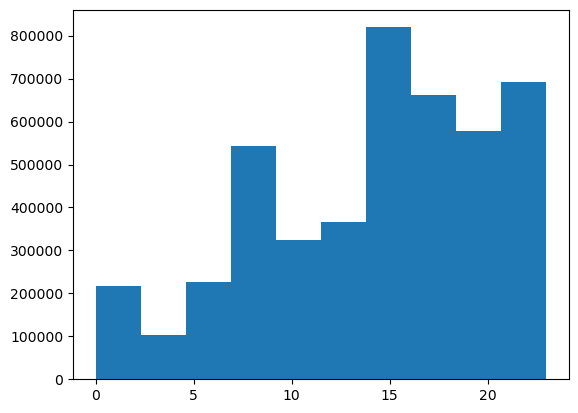

In [20]:
plt.hist(data_uber2014['hour'])

Puncak traffic terjadi sekitar pukul 15 (3 sore).

## Analisa 3: Setiap bulannya, pada jam berapa traffic uber tertinggi dan terendahnya?

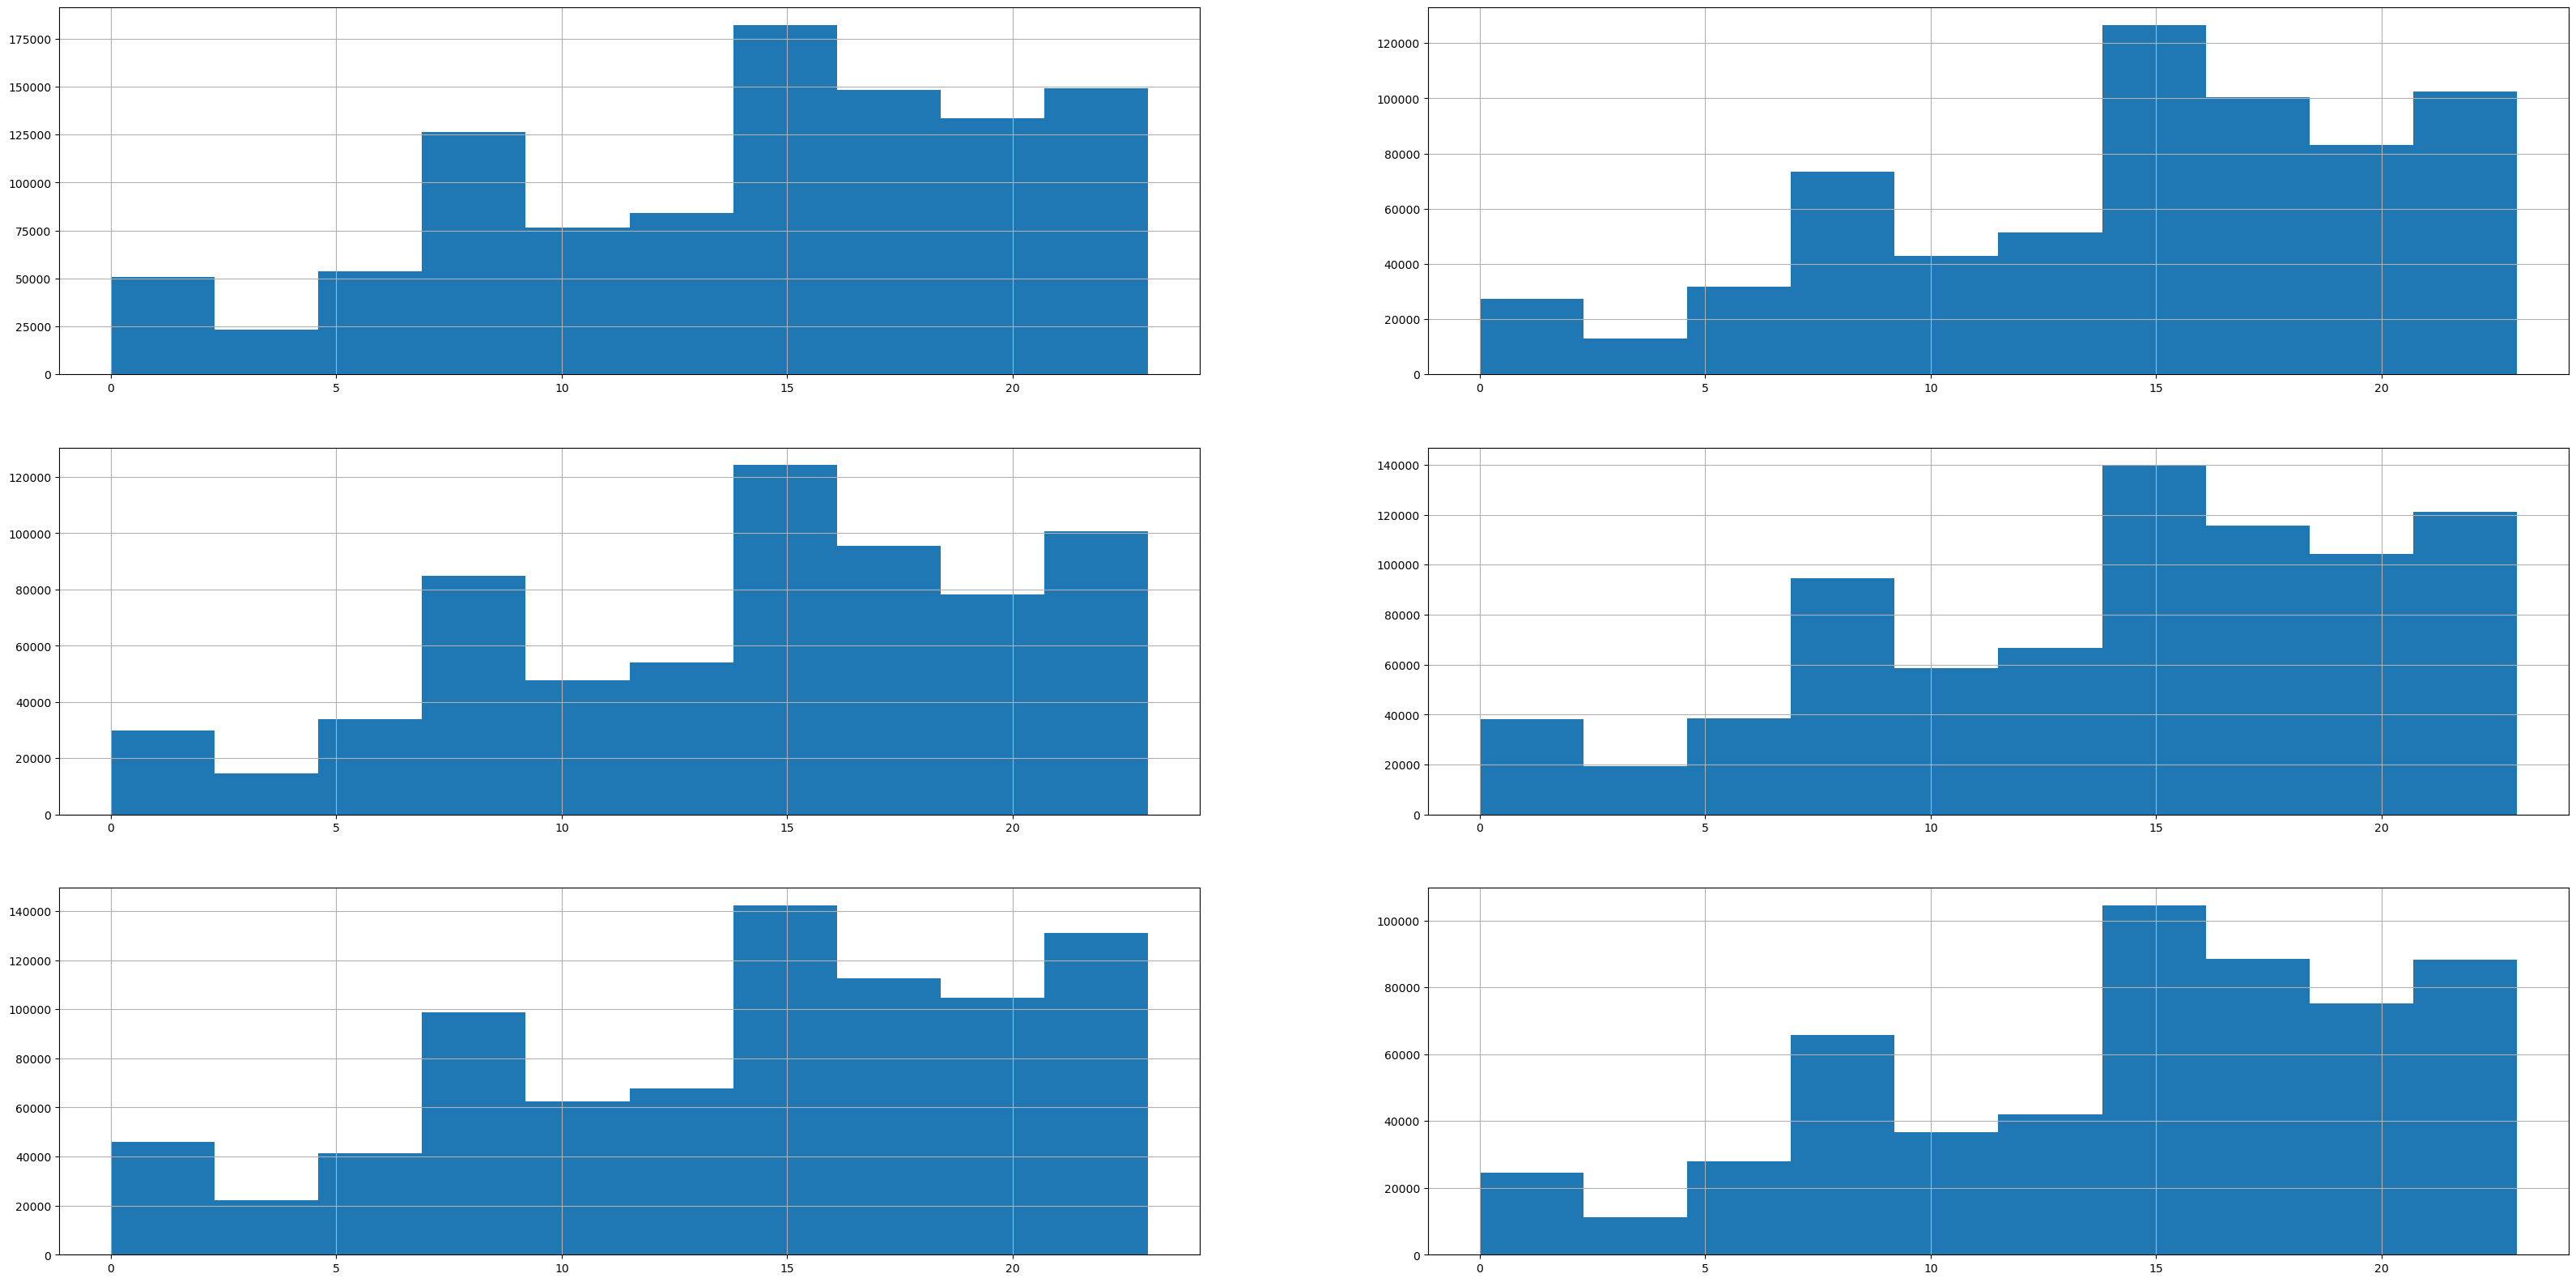

In [21]:
plt.figure(figsize=(40,20))

for i,month in enumerate(data_uber2014['month'].unique()):
    plt.subplot(3,2,i+1)
    data_uber2014[data_uber2014['month']==month]['hour'].hist()

## Analisa 4: Pada jam berapa setiap bulannya traffic uber tertinggi dan terendahnya?

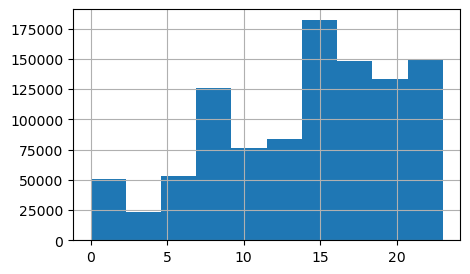

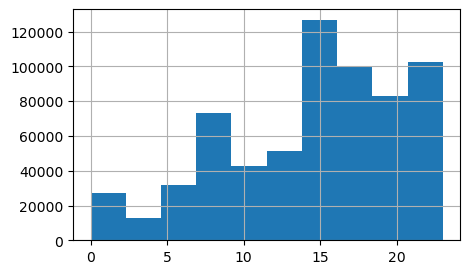

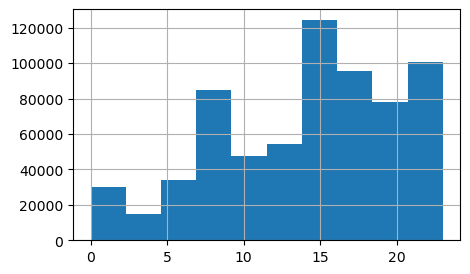

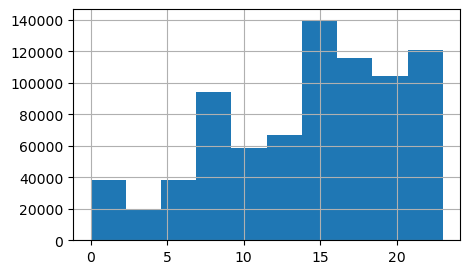

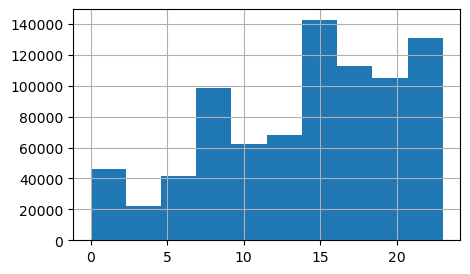

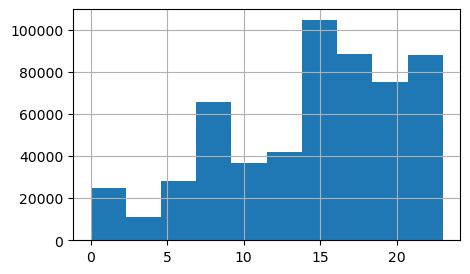

In [22]:
for i in data_uber2014['month'].unique():
    plt.figure(figsize=(5,3))
    data_uber2014[data_uber2014['month']==i]['hour'].hist()

## Analisa 5: Pada bulan apa total traffic uber yang paling lama?

In [23]:
!pip install chart_studio

In [24]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [25]:
px.bar(x = data_uber2014['month'].value_counts().index,
       y = data_uber2014['month'].value_counts().values)

## Analisa 6: Total jumlah perjalanan di uber berdasarkan tanggal dalam 1 bulan selama 2014

Text(0.5, 1.0, 'Journey by Month Day')

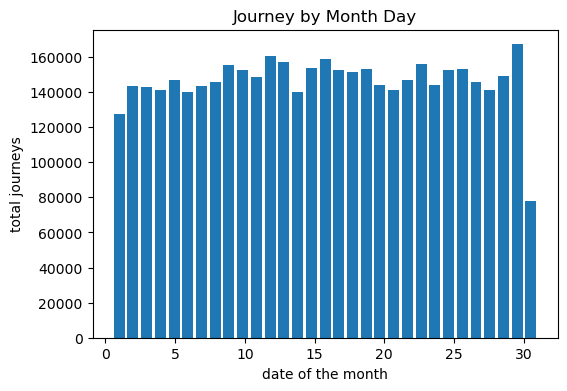

In [26]:
plt.figure(figsize=(6,4))
plt.hist(data_uber2014['day'], bins=31, rwidth=.8, range=(0.5,31))
plt.xlabel('date of the month')
plt.ylabel('total journeys')
plt.title('Journey by Month Day')

## Analisa 7: Jumlah perjalanan uber berdasarkan tanggal dan bulannya

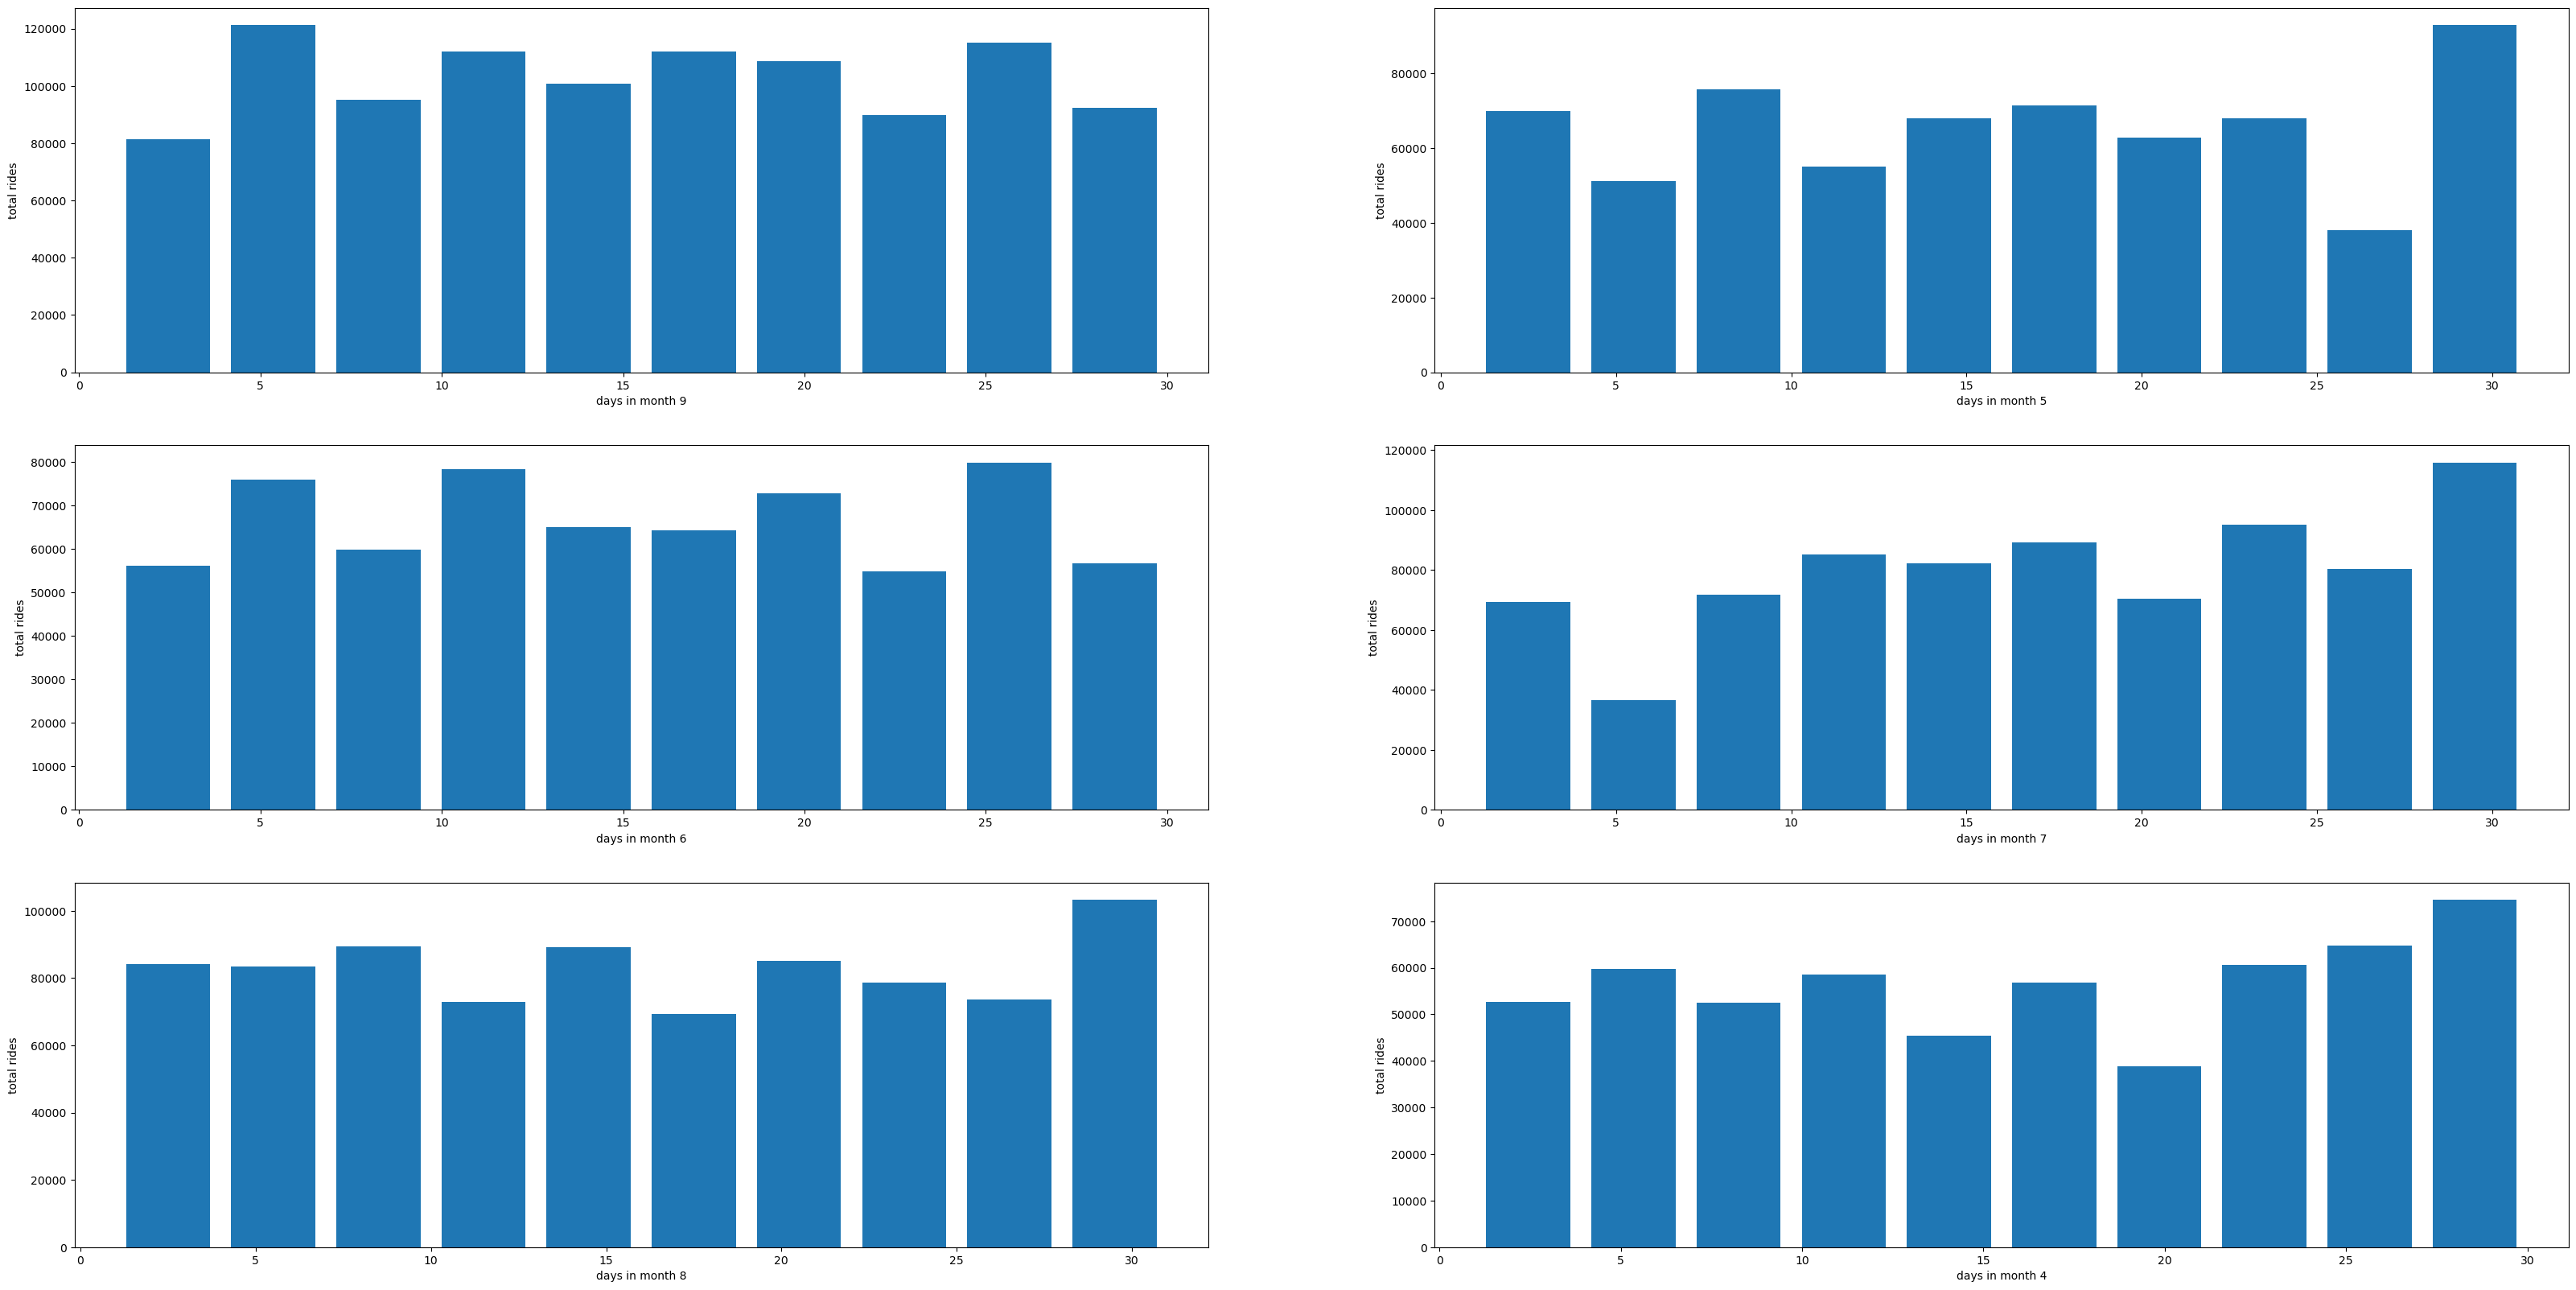

In [27]:
plt.figure(figsize=(40,20))

for i,month in enumerate(data_uber2014['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out = data_uber2014[data_uber2014['month']==month]
    plt.hist(df_out['day'], rwidth=0.8)
    plt.xlabel('days in month %i' %month)
    plt.ylabel('total rides')


## Analisa 8: Kepadatan traffic uber berdasarkan jam dan latitudenya

<Axes: xlabel='hour', ylabel='Lat'>

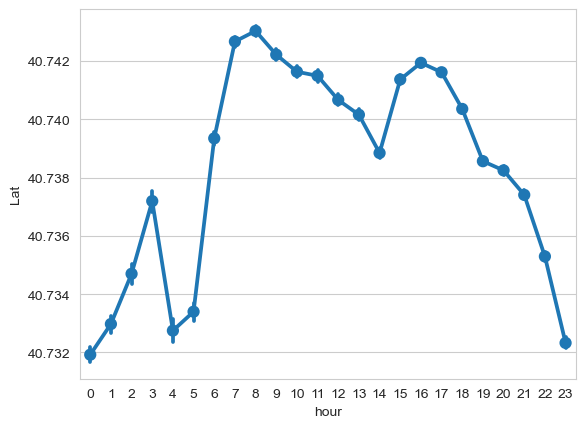

In [28]:
sns.set_style(style='whitegrid')
sns.pointplot(x='hour', y='Lat', data=data_uber2014)

Text(0.5, 1.0, 'hour vs weekday vs latitude of passenger')

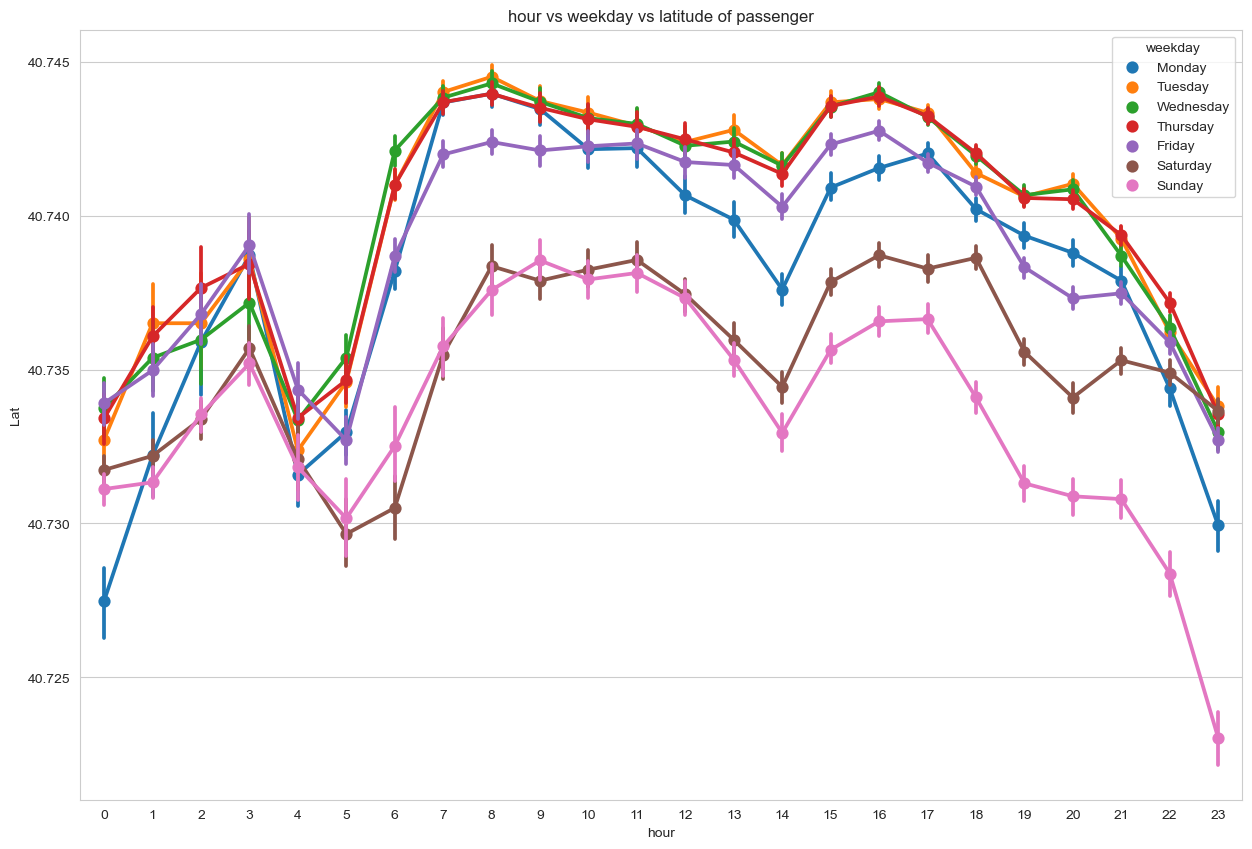

In [29]:
plt.figure(figsize=(15,10))
ax = sns.pointplot(x='hour', y='Lat', hue='weekday', data=data_uber2014)
ax.set_title('hour vs weekday vs latitude of passenger')


## Analisa 9: Base mana yang banyak digunakan dalam perjelanan uber?

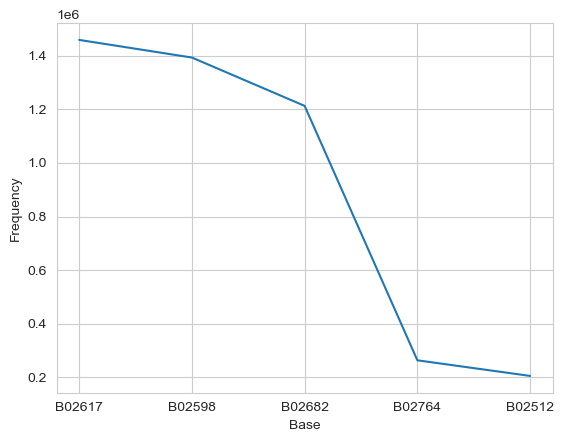

In [30]:
data = data_uber2014['Base'].value_counts()

sns.lineplot(x=data.index, y=data.values)
plt.xlabel('Base')
plt.ylabel('Frequency')
plt.show()

In [31]:
px.line(x = data_uber2014['Base'].value_counts().index,
       y = data_uber2014['Base'].value_counts().values)

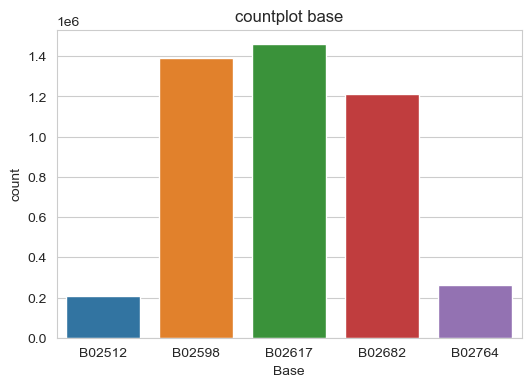

In [32]:
plt.figure(figsize=[6,4])
sns.countplot(x = 'Base', data = data_uber2014)
plt.title('countplot base')
plt.show()